**Objective:** The objective of this notebook is to prepare the model by training and cleaning the data. It'll be the first version of the model

# **Setup:**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 16
version = 4

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My Drive/image_processing/fruit_recognizer

/content/drive/My Drive/image_processing/fruit_recognizer


# **Data Fetch:**

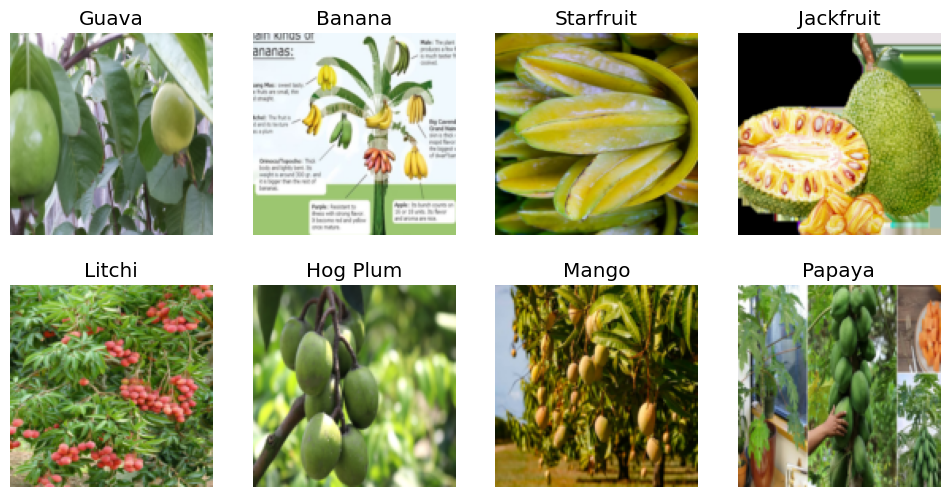

In [7]:
data_path = 'data'

def is_valid_image(file):
    try:
        with Image.open(file) as img:  # Open the image
            img.verify()  # Verify integrity
        return True
    except:
        return False

def get_valid_images(path):
    return [f for f in get_image_files(path) if is_valid_image(f)]  # Ensures only valid images are used

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_valid_images,  # Use the filtered image list
    splitter=RandomSplitter(valid_pct=0.2, seed=97),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = dblock.dataloaders(data_path, bs=bs)  # Ensure `bs` is defined
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs=bs)

dls.valid.show_batch(max_n=8, nrows=2)

In [8]:
dataloader_path = "dataloader"
if not os.path.exists(dataloader_path):
    os.mkdir(dataloader_path)
torch.save(dls, f'{dataloader_path}/fruit_recognizer_dataloader_v3.pth')

# **Training and saving model:**

In [9]:
model_path = "models"

In [10]:
model = vision_learner(dls, resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 115MB/s]


In [ ]:
dls.train.vocab

['Banana', 'Coconut', 'Guava', 'Hog Plum', 'Jackfruit', 'Litchi', 'Mango', 'Papaya', 'Starfruit', 'Watermelon', 'Wood Apple']

In [11]:
model.fine_tune(12)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.443061,1.615661,0.320285,0.679715,01:19


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.556155,1.100587,0.266904,0.733096,00:40
1,1.272740,0.936624,0.234875,0.765125,00:39
2,1.079116,0.773617,0.227758,0.772242,00:38
3,0.885045,0.745885,0.195730,0.804270,00:38
4,0.789162,0.597573,0.174377,0.825623,00:37
5,0.676506,0.598424,0.167260,0.832740,00:38
6,0.595779,0.642514,0.163701,0.836299,00:40
7,0.504365,0.790040,0.160142,0.839858,00:40
8,0.477465,0.730081,0.160142,0.839858,00:38
9,0.412704,0.558395,0.167260,0.832740,00:40


In [12]:
model.export(f'{model_path}/fruit_recognizer_v{version}.pkl')

# **Model Interpretation:**

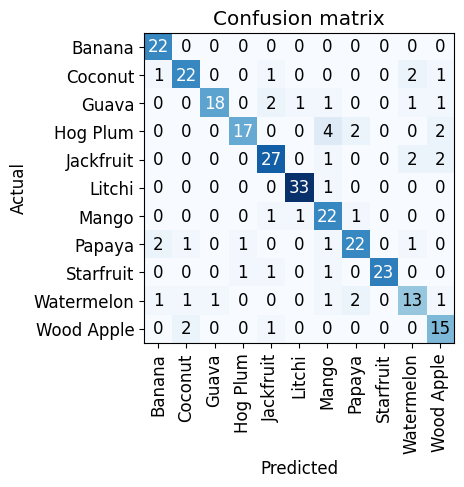

In [13]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

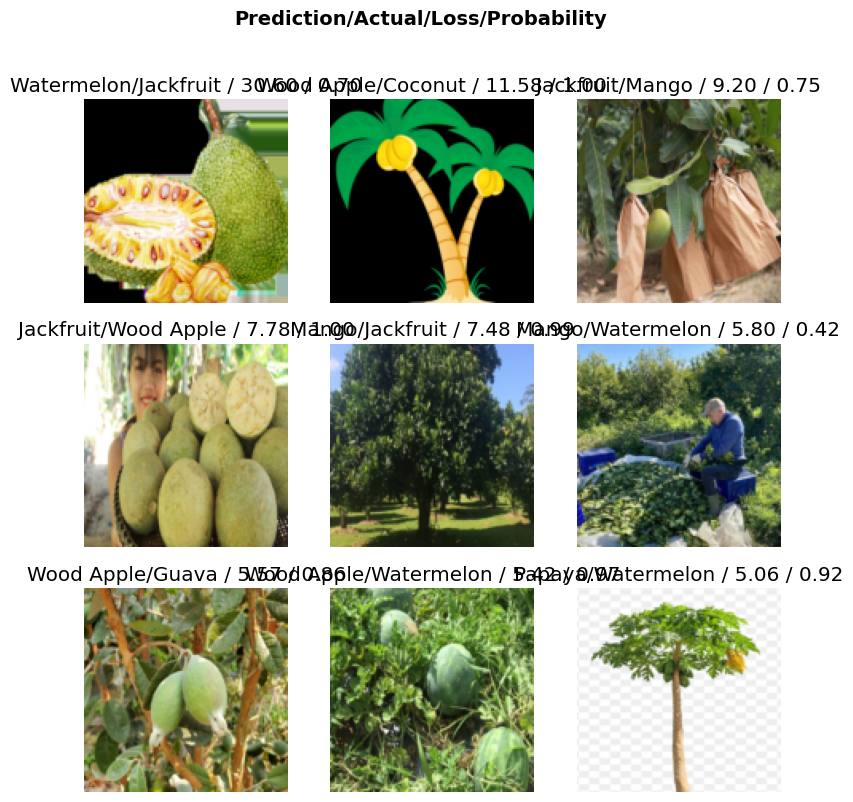

In [14]:
interp.plot_top_losses(9, nrows=3)

# **Training and saving model - 2:**

In [ ]:
version = 2

In [ ]:
model = vision_learner(dls, resnet18, metrics=[error_rate, accuracy])

In [ ]:
model.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.997263,1.538281,0.434066,0.565934,00:24


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.737600,1.306907,0.406593,0.593407,00:26
1,1.577110,1.226106,0.368132,0.631868,00:24
2,1.307214,0.995797,0.302198,0.697802,00:24
3,1.062145,1.055839,0.313187,0.686813,00:23
4,0.925372,1.095548,0.280220,0.719780,00:25
5,0.764257,1.052390,0.274725,0.725275,00:25
6,0.696113,1.024956,0.280220,0.719780,00:26
7,0.591135,1.041629,0.258242,0.741758,00:24


In [ ]:
model.export(f'{model_path}/fruit_recognizer_v{version}.pkl')

# **Model interpretation - 2:**

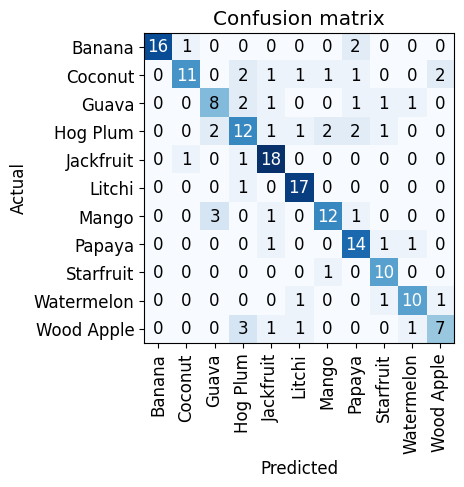

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

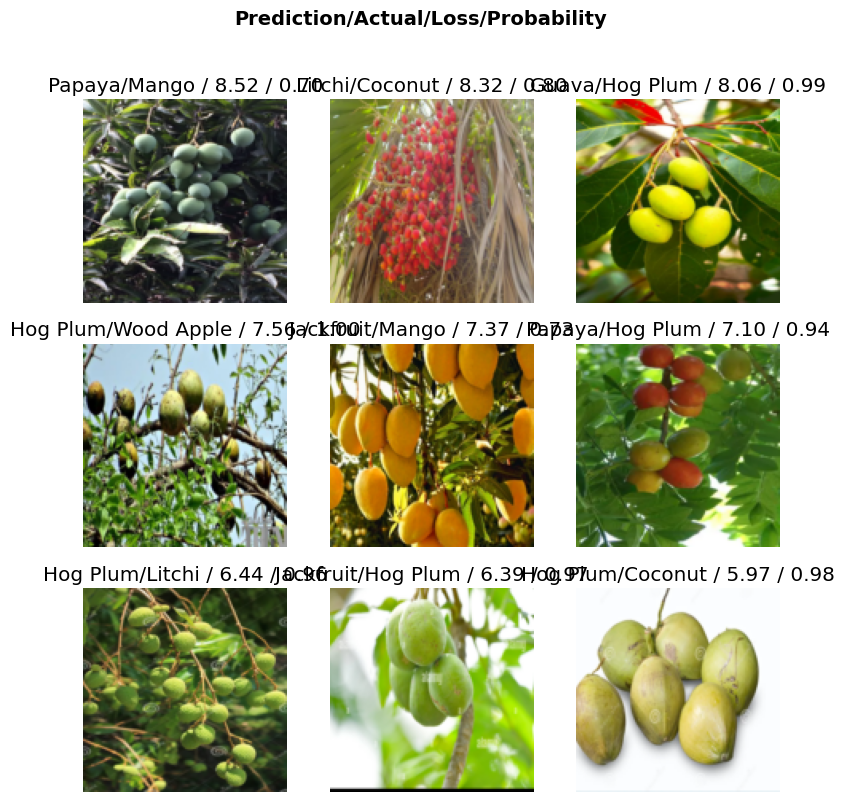

In [ ]:
interp.plot_top_losses(9, nrows=3)

# **Training and saving model - 3**

In [ ]:
version = 3

In [ ]:
model = vision_learner(dls, resnet18, metrics=[error_rate, accuracy])

In [ ]:
model.fine_tune(12)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.829348,1.554140,0.439560,0.560440,00:24


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.733155,1.302134,0.373626,0.626374,00:23
1,1.571845,1.047112,0.313187,0.686813,00:23
2,1.398380,1.074262,0.318681,0.681319,00:24
3,1.226658,1.151718,0.313187,0.686813,00:25
4,1.053315,1.067635,0.252747,0.747253,00:28
5,0.858821,0.980560,0.274725,0.725275,00:25
6,0.726204,0.957266,0.247253,0.752747,00:26
7,0.648118,0.872629,0.241758,0.758242,00:24
8,0.601536,0.966007,0.263736,0.736264,00:25
9,0.477465,0.882209,0.241758,0.758242,00:25


In [ ]:
model.export(f'{model_path}/fruit_recognizer_v{version}.pkl')